## Changelog

#### 17/01/25
- Found the dataset that I want to use from this link (https://www.geeksforgeeks.org/dataset-for-sentiment-analysis/#1-imdb-reviews-dataset)
- This is a sentiment analysis dataset taken from IMDB movie reviews and it is used to find out whether or not a review is positive or negative based on the words used in the reviews
- It has 50,000 rows, it is a good starting point whilst getting used to the new model and I want to see how accurate I can get it at predicting sentiments
- The dataset only contains 2 columns as it is the full text of the review and then whether it is a positive or negative review
- A multinomial Bayesian Classifier seems to be the best fit for this dataset as this will have a high number of features which multinomial bayesian classifiers are good at handling. I tried a few different types of classifier but multinomial works best, multinomial works by counting word frequencies in each category, calculating probabilities, and choosing the category with the highest likelihood. This works well for this dataset as they are very set categories as they're either positive or negative.
- I used JakeVDP's notebook on this as a base guideline but have had to change a lot of aspects as he was using sample data so I had to adapt it for my own dataset.
- I had to change a lot for this to work such as figuring out how to make my data fit with a pipeline as the example he used takes a different structure.

#### 29/01/25

- I now understand the function of the pipeline as it combines the 2 other functions into one model so that the now numerical data can be analysed by the model. This took me just over an hour as I wanted to fully understand how it was working as the concept was initially confusing me. (This link http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html and chatgpt helped me understand the concept)
- I now have a basic version working of this model with a decent accuracy rating of 70%, I want to see if I can improve this anymore.
- I now have a good version of the model working with an 86% accuracy rating which for a sentiment analysis model like this is quite a good rating.

#### 31/01/25
- I have seen what words are contributing to predicting each of the reviews and a lot of them are filler words so I want to see if I can remove these and it might improve the accuracy rating of the model too as for false positives and negatives it could be coming form these words as they will appear in both positive and negative reviews
- I have now removed filler words and it has upped the accuracy to 87% which isn't major but it is still an improvement, it also now makes more sense with the words that are the most common in each review as they are traditionally positive and negative words
- I now want to see if I can create my own neutral list of words as there are still a lot of the top words that don't really apply to either of the fields, this might up the accuracy again.
- I have tried this and the words look more realistic now but unfortunately it didn't help with the accuracy.

## Final Overview

- My model now has an accuracy rating of 87% which I am quite happy with as it's unlikely to get a really high level of accuracy (over 90%) due to a few reasons
- If I had a little bit more time I would try to get some sort of detector for sarcasm as this is definitely dropping the accuracy as it could be seeing positive words put into a review but bbeing used sarcastically so this is providing a false result
- I haven't deployed this model but I would have some sort of input box maybe on a website where you can enter your review and then the model could process this and display the result on screen for the user.
- There wasn't a whole lot of preprocessing for this model, one thing that I did do to filter the dataset was removing stop words, I did this as when I looked at the words that were having the biggest affect on predicting whether the review was positive or negative it was words such as It, Has, Can, etc. Removing this did bump the accuracy and then I added my own custom list of words that I found were appearing a lot too which didn't bump the accuracy but gave better words for the most prevalent decision making words.
- I took a good bit of time on this model to understand how pipelines work, I was working off of JakeVDP's Jupyter Notebook and he used this but didn't really explain how they work so I went and researched myself.
![Pipeline Diagram](Pipeline.png)
- This diagram is a good visualisation as to how they work, the main place that I used for research was SciKit Learn's documentation (read more here: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- Pipelines work by combining multiple different preprocessing steps and your model into a single object so you don't have to do them all individually which is very helpful when you are using a few different types of preprocessing


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv('IMDB-Dataset.csv')
print(ds.head())
# This isjust importing the data and printing the first 5 rows of the data to ensure that the data is imported correctly

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
custom_stopwords = {"seen", "think", "watch", "movies", "life", "just", "film", "movie", "films", "br", "just"}

# Function to remove custom words
def remove_custom_words(text):
    words = text.split()  # Split into words
    cleaned_words = [word for word in words if word.lower() not in custom_stopwords]
    return " ".join(cleaned_words)

# Apply the function to the text column
ds["cleaned_review"] = ds["review"].apply(remove_custom_words)

In [4]:
categories = ['Positive', 'Negative']

from sklearn.model_selection import train_test_split

X = ds['review']
y = ds['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  This is splitting the data into training and testing data using an 80/20 split


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())



This was obtained from Jake VanderPlas' book Python Data Science Handbook.
The TfidfVectorizer converts the text data into numerical data that can be used by the model.
The MultinomialNB is the model that is used to predict the sentiment of the reviews.
The make_pipeline is used to combine the TfidfVectorizer and MultinomialNB into a single model.
<br>

I tried a couple of different types of model to use here but I eventually decided to go with multinomial as it performs well with smaller datasets such as the one used in this model, it also handles word frequency which for a model such as this one is vital.

In [6]:
model.fit(X_train, y_train)
labels = model.predict(X_test)

# This is fitting the model to the training data and then predicting the sentiment of the reviews in the testing data

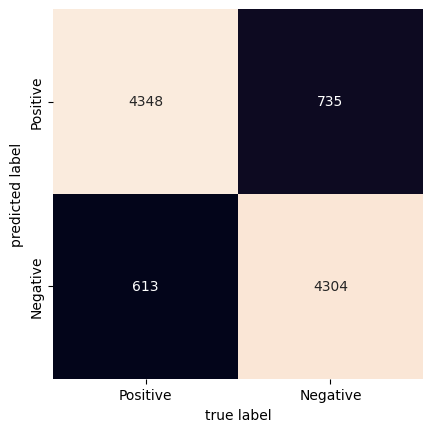

In [7]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label');

# This is creating a confusion matrix to show the accuracy of the model
# As can be seen from the confusion matrix, the model is very accurate in predicting the sentiment of the reviews but it is not perfect as it does have a decent amount of false results

In [12]:
example_reviews = ["This movie was an interesting one! Overall it was good however there were some issues, i did enjoy it"]

result = model.predict(example_reviews)
if result[0] == 'positive':
    print('Positive Review')
else:
    print('Negative Review')

# This is just an example of how the model can be used to predict the sentiment of a review

Positive Review


In [9]:
from sklearn.metrics import classification_report

classification_report(y_test, labels, target_names=['Positive', 'Negative'])

print(classification_report(y_test, labels, target_names=['Positive', 'Negative']))

#  This is printing the classification report which shows the precision, recall and f1-score of the model

              precision    recall  f1-score   support

    Positive       0.86      0.88      0.87      4961
    Negative       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [10]:
vectorizer = model.named_steps['tfidfvectorizer']
classifier = model.named_steps['multinomialnb']

feature_names = np.array(vectorizer.get_feature_names_out())
log_probabilities = classifier.feature_log_prob_

# Identify top N words contributing to positive and negative sentiment
top_n = 20  # Number of top words to display

# Get top words for positive and negative sentiment
top_positive_words = feature_names[np.argsort(log_probabilities[1])[-top_n:]]
top_negative_words = feature_names[np.argsort(log_probabilities[0])[-top_n:]]

# Display results
print("Top words associated with Positive sentiment:")
print(", ".join(top_positive_words))

print("Top words associated with Negative sentiment:")
print(", ".join(top_negative_words))

# This was partially obtained from ChatGPT and it is used to identify the top words that contribute to positive and negative sentiment

Top words associated with Positive sentiment:
way, films, seen, think, watch, movies, life, people, best, love, really, time, just, story, like, good, great, film, movie, br
Top words associated with Negative sentiment:
seen, better, worst, watch, people, make, story, plot, acting, movies, time, don, really, good, like, just, bad, film, movie, br


 This is interesting and it isn't the words that I was expecting to see in the results for determining what are going to be the positive and negative reviews, I think a lot of these words are filler words that aren't really affecting it but they just happen to be prevalent in the results so I want to see if I can get rid of these


 #### Solution:
 I found on google that there is a parameter that I can add to the Tfid Vectoriser that removes common english filler words (stop words), this made the model slightly more accurate and it made the top words for each, more along the lines of what they should be with typical positive and negative words.